# Wrangle and Analyze Data Project




## Table of Contents
- [Gathering Data](#gather)
- [Assessing Data](#asses)
- [Cleaning Data](#clean)
- [Data Analysis](#analyze)

In [1]:
#Importing needed libs:
import pandas as pd
import numpy as np
import os
import tweepy
import json
from tweepy import OAuthHandler
import requests
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='gather'></a>
## Gathering Data

1. Reading from CSV file: twitter_archive_enhanced.csv

In [2]:
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')
df_tweets.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2118,670420569653809152,NaN,NaN,2015-11-28 01:54:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Damon. The newest presidential candida...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670420569...,10,10,Damon,None,None,None,None
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
170,859074603037188101,NaN,NaN,2017-05-01 15:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an exotic dog. Good at ukulele. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859074603...,13,10,None,None,None,None,None
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
2098,670727704916926465,NaN,NaN,2015-11-28 22:15:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrie. He's a handheld pup. Excellen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670727704...,10,10,Jeffrie,None,None,None,None
1053,742465774154047488,NaN,NaN,2016-06-13 21:16:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Was just informed about this hero pupper and o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742465774...,14,10,None,None,None,pupper,None
325,833863086058651648,NaN,NaN,2017-02-21 02:17:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. Hairbrushes are his favorite ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833863086...,12,10,Bentley,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [3]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Downloading a TSV file using `requests` library hosted on the Udacity server

In [4]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# getting the response
response = requests.get(url)

# opening the downloded tsv file
with open('./image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
df_image_pred = pd.read_csv('./image-predictions.tsv', sep='\t')

In [5]:
df_image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1264,749064354620928000,https://pbs.twimg.com/media/CmU2DVWWgAArvp3.jpg,2,pug,0.985222,True,Brabancon_griffon,0.003314,True,Pekinese,0.002989,True
1347,759447681597108224,https://pbs.twimg.com/media/CooZok_WEAA7oPw.jpg,1,kuvasz,0.223148,True,Bedlington_terrier,0.220731,True,teddy,0.181303,False
653,682047327939461121,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
62,667160273090932737,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,True,miniature_poodle,0.091992,True,standard_poodle,0.087385,True
1252,747963614829678593,https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg,1,kelpie,0.307672,True,Irish_terrier,0.197486,True,dingo,0.105475,False
262,670789397210615808,https://pbs.twimg.com/media/CU8fZSQWoAEVp6O.jpg,1,beagle,0.295966,True,basset,0.143527,True,bluetick,0.138992,True
1469,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True
167,668986018524233728,https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg,1,doormat,0.976103,False,Chihuahua,0.005640,True,Norfolk_terrier,0.003913,True
1965,867421006826221569,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,Eskimo_dog,0.616457,True,Siberian_husky,0.381330,True,malamute,0.001670,True
136,668507509523615744,https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg,1,basenji,0.055379,True,Shetland_sheepdog,0.054322,True,whippet,0.051913,True


3. Data from twitter API

In [6]:
df_tweets_info = pd.read_json('tweet_json.txt', lines=True)
df_tweets_info.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1828,NaN,NaN,2015-12-14 01:58:31,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676219682148499456, 'id_str'...",67100,False,This is Kenneth. He's stuck in a bubble. 10/10...,NaN,...,0.0,NaN,NaN,NaN,31989,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1285,NaN,NaN,2016-03-11 18:18:36,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 708356456928649216, 'id_str'...",3929,False,This is Oliver. That is his castle. He protect...,NaN,...,0.0,NaN,NaN,NaN,1520,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
579,NaN,NaN,2016-11-20 22:02:27,"[0, 87]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 800459302930628608, 'id_str'...",10538,False,Here's a very sleepy pupper. Appears to be por...,NaN,...,0.0,NaN,NaN,NaN,2489,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2344,NaN,NaN,2015-11-16 01:01:59,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666058597072306176, 'id_str'...",115,False,Here is the Rand Paul of retrievers folks! He'...,NaN,...,0.0,NaN,NaN,NaN,61,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1445,NaN,NaN,2016-02-08 00:20:23,"[0, 46]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 696488707105386500, 'id_str'...",2788,False,12/10 revolutionary af https://t.co/zKzq4nIY86,NaN,...,0.0,NaN,NaN,NaN,1166,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2045,NaN,NaN,2015-12-01 02:38:04,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671518582749028352, 'id_str'...",1010,False,This is Scruffers. He's being violated on mult...,NaN,...,0.0,NaN,NaN,NaN,319,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2210,NaN,NaN,2015-11-23 00:30:28,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1760,False,Never forget this vine. You will not stop watc...,NaN,...,0.0,NaN,NaN,NaN,1174,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1227,NaN,NaN,2016-03-26 16:15:05,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 713761188442677248, 'id_str'...",5308,False,This is Piper. She would really like that tenn...,NaN,...,0.0,NaN,NaN,NaN,1541,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
457,NaN,NaN,2017-01-08 01:40:55,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,5356,False,Looks like he went cross-eyed trying way too h...,NaN,...,0.0,{'created_at': 'Sun Jan 08 01:13:46 +0000 2017...,8.179021e+17,8.179021e+17,906,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
830,NaN,NaN,2016-08-24 23:50:10,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 768596278481657856, 'id_str'...",5592,False,Say hello to Oakley and Charlie. They're convi...,NaN,...,0.0,NaN,NaN,NaN,1473,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


#### 3 Dataframes has been gatehred from 3 diffrent sources:
- `df_tweets`
- `df_tweets_info`
- `df_image_pred`

<a id='asses'></a>
## Assessing Data

#### Assessing the data visually:

In [7]:
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
df_image_pred.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1604,800388270626521089,https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg,2,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True
1088,718971898235854848,https://pbs.twimg.com/media/CfpNGTHUIAAA8XC.jpg,1,golden_retriever,0.140394,True,Saint_Bernard,0.118769,True,Labrador_retriever,0.075492,True
546,677328882937298944,https://pbs.twimg.com/media/CWZbBlAUsAAjRg5.jpg,1,water_buffalo,0.424250,False,kelpie,0.029054,True,Staffordshire_bullterrier,0.028470,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
1146,730573383004487680,https://pbs.twimg.com/media/CiOEnI6WgAAmq4E.jpg,2,American_Staffordshire_terrier,0.810158,True,Labrador_retriever,0.058205,True,Weimaraner,0.027930,True
671,683111407806746624,https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg,1,cocker_spaniel,0.901392,True,soft-coated_wheaten_terrier,0.028605,True,miniature_schnauzer,0.017805,True
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False
1790,830097400375152640,https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg,4,toy_poodle,0.442713,True,Pomeranian,0.142073,True,Pekinese,0.125745,True
558,677698403548192770,https://pbs.twimg.com/media/CWerGmOXAAAm6NY.jpg,1,Shih-Tzu,0.916645,True,Lhasa,0.057883,True,Pekinese,0.020126,True
328,672068090318987265,https://pbs.twimg.com/media/CVOqW8eUkAESTHj.jpg,1,pug,0.863385,True,shopping_cart,0.125746,False,Border_terrier,0.002972,True


In [9]:
df_tweets_info.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
251,NaN,NaN,2017-03-23 18:07:10,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 844973805558685696, 'id_str'...",16361,False,This is Brady. He's a recovering alcoholic. De...,NaN,...,0.0,NaN,NaN,NaN,3617,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1080,NaN,NaN,2016-06-04 00:01:35,"[0, 78]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 738883339164192768, 'id_str'...",3661,False,When a single soap orb changes your entire per...,NaN,...,0.0,NaN,NaN,NaN,917,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1426,NaN,NaN,2016-02-11 03:02:54,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 697616761932283904, 'id_str'...",3467,False,This pupper doubles as a hallway rug. Very rar...,NaN,...,0.0,NaN,NaN,NaN,1144,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
693,NaN,NaN,2016-10-14 00:47:00,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Oakley. He has no idea ...,NaN,...,NaN,NaN,NaN,NaN,2827,False,{'created_at': 'Sat Jul 30 17:56:51 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1559,NaN,NaN,2016-01-16 15:40:14,"[0, 94]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 688385255020036098, 'id_str'...",10180,False,This is Louis. He's takes top-notch selfies. 1...,NaN,...,0.0,NaN,NaN,NaN,5035,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
858,NaN,NaN,2016-08-10 00:16:21,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Eve. She's a raging alcoho...,NaN,...,NaN,NaN,NaN,NaN,3484,False,{'created_at': 'Sun Dec 06 00:17:55 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
165,NaN,NaN,2017-05-04 00:15:58,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 859924516142804992, 'id_str'...",20021,False,Meet Milky. She has no idea what happened. Jus...,NaN,...,0.0,NaN,NaN,NaN,4349,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2263,NaN,NaN,2015-11-20 02:47:56,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667534814648496128, 'id_str'...",866,False,"This is Frank (pronounced ""Fronq""). Too many b...",NaN,...,0.0,NaN,NaN,NaN,576,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
549,NaN,NaN,2016-12-02 17:27:25,"[0, 97]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 804738744741928960, 'id_str'...",15326,False,This is Django. He accidentally opened the fro...,NaN,...,0.0,NaN,NaN,NaN,4480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
570,NaN,NaN,2016-11-23 21:29:33,"[0, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 801538154108952576, 'id_str'...",9141,False,This is Wallace. He'll be your chau-fur this e...,NaN,...,0.0,NaN,NaN,NaN,2391,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


#### Assessing the data programmatically:

1. `df_tweets`


In [10]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#761750502866649088
df_tweets[df_tweets['tweet_id']==761750502866649088].source

868    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [12]:
df_tweets.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Toby           7
Buddy          7
Daisy          7
an             7
Bailey         7
Scout          6
Dave           6
Jack           6
Jax            6
Milo           6
Stanley        6
Leo            6
Oscar          6
Rusty          6
Bella          6
Koda           6
Sunny          5
            ... 
Ronnie         1
Baron          1
Banditt        1
Chef           1
Tedrick        1
Jennifur       1
Stark          1
Harry          1
Donny          1
DayZ           1
Mimosa         1
Alexander      1
Buckley        1
Champ          1
Rover          1
Duchess        1
Joshwa         1
Jo             1
Anna           1
Ralphie        1
Livvie         1
Tater          1
Jaspers        1
Kirk           1
Nico           1
Meatball       1
Scruffers      1
Goose         

In [13]:
df_tweets[df_tweets.rating_denominator > 10].shape

(20, 17)

In [14]:
# From Udacity:
all_columns = pd.Series(list(df_tweets) + list(df_image_pred) + list(df_tweets))
all_columns[all_columns.duplicated()]

17                      tweet_id
29                      tweet_id
30         in_reply_to_status_id
31           in_reply_to_user_id
32                     timestamp
33                        source
34                          text
35           retweeted_status_id
36      retweeted_status_user_id
37    retweeted_status_timestamp
38                 expanded_urls
39              rating_numerator
40            rating_denominator
41                          name
42                         doggo
43                       floofer
44                        pupper
45                         puppo
dtype: object

In [15]:
df_tweets[(df_tweets.name.duplicated()) & (df_tweets.name != 'None')].shape

(655, 17)

In [16]:
df_tweets[(df_tweets.tweet_id.duplicated())].shape

(0, 17)

In [17]:
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
df_tweets[df_tweets.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [19]:
df_tweets[df_tweets.doggo != 'None'].shape

(97, 17)

In [20]:
df_tweets.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Toby           7
Buddy          7
Daisy          7
an             7
Bailey         7
Scout          6
Dave           6
Jack           6
Jax            6
Milo           6
Stanley        6
Leo            6
Oscar          6
Rusty          6
Bella          6
Koda           6
Sunny          5
            ... 
Ronnie         1
Baron          1
Banditt        1
Chef           1
Tedrick        1
Jennifur       1
Stark          1
Harry          1
Donny          1
DayZ           1
Mimosa         1
Alexander      1
Buckley        1
Champ          1
Rover          1
Duchess        1
Joshwa         1
Jo             1
Anna           1
Ralphie        1
Livvie         1
Tater          1
Jaspers        1
Kirk           1
Nico           1
Meatball       1
Scruffers      1
Goose         

In [21]:
df_tweets[df_tweets.name == 'a'].shape

(55, 17)

In [22]:
df_tweets[df_tweets.name == 'the'].shape

(8, 17)

In [23]:
df_tweets[df_tweets.name == 'an'].shape

(7, 17)

In [24]:
df_tweets[df_tweets.text.str.contains('RT')].shape

(192, 17)

2. `df_image_pred`

In [25]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
df_image_pred[(df_image_pred.p1_conf > 1) | (df_image_pred.p1_conf < 0)].shape

(0, 12)

In [27]:
df_image_pred[(df_image_pred.p2_conf > 1) | (df_image_pred.p2_conf < 0)].shape

(0, 12)

In [28]:
df_image_pred[(df_image_pred.p3_conf > 1) | (df_image_pred.p3_conf < 0)].shape

(0, 12)

In [29]:
df_image_pred[(df_image_pred.p1_dog == False) & (df_image_pred.p2_dog == False) &( df_image_pred.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


3. `df_tweets_info`

In [30]:
df_tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [31]:
df_tweets_info.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


In [32]:
df_tweets_info[df_tweets_info.id.duplicated()].head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


In [33]:
df_tweets_info.id.nunique()

2354

In [34]:
df_tweets_info.favorite_count.nunique()

2007

In [35]:
df_tweets_info[df_tweets_info.favorite_count.duplicated()].head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
35,NaN,NaN,2017-07-13 01:35:06,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...",0,False,RT @dog_rates: This is Lilly. She just paralle...,NaN,...,0.0,NaN,NaN,NaN,19297,False,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
67,NaN,NaN,2017-06-26 00:13:58,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Emmy. She was adopted t...,NaN,...,NaN,NaN,NaN,NaN,7181,False,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
72,NaN,NaN,2017-06-24 00:09:53,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Shadow. In an attempt to r...,NaN,...,NaN,NaN,NaN,NaN,1349,False,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
73,NaN,NaN,2017-06-23 18:17:33,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Terrance. He's being yelle...,NaN,...,NaN,NaN,NaN,NaN,6965,False,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
77,NaN,NaN,2017-06-21 19:36:23,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...",0,False,RT @rachel2195: @dog_rates the boyfriend and h...,NaN,...,0.0,NaN,NaN,NaN,83,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [36]:
df_tweets_info[df_tweets_info.full_text.isnull() == False].shape

(2354, 31)

In [37]:
df_tweets_info[df_tweets_info.full_text.str.contains('RT') == False]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


1. #### Quality issues:

#### General quality issues to be cleaned:

- Some cloumns have names that do not represent them, or have unclear names.

##### `df_tweets` dataframe:

- Erroneous datatypes (timestamp column should be datetime object).
- Columns with too many null values or not needed for the analysis (source, retweeted_status_timestamp, retweeted_status_user_id, retweeted_status_id,in_reply_to_user_id, in_reply_to_status_id). Most of them cannot be fixed.
- Missing values in dog name column or has wrong names like 'a' or 'the' ('None' values shuold be replaced with NaN).
- Denominator for the rating is grater than 10 in some rows.
- Timestamps having an extra '+0000'.

##### `df_image_pred` dataframe:

- Predictions are lowercased and have an extra dash (p1, p2, p3).
- Rows where all predictions are not dog predictions should be null(ie. p1_dog and p2_dog and p3_dog are all false).

##### `df_tweets_info` dataframe:

- Unnecessary columns (4 columns are just needed).
- The rows that contains 'RT' in the text column, which indicate it is a retweet, so it is redundant data.

2. #### Tideness issues to be cleaned:

#### General structural issues:

- The 3 dataframes should be joined on tweet_id.

##### `df_tweets` dataframe:
- The 4 coulmns of dog breed should be compined into one cloumn called dog_type.

<a id='clean'></a>
## Cleaning Data

In [38]:
# Making copies of all dataframes:
df_tweets_clean = df_tweets.copy()
df_info_clean = df_tweets_info.copy()
df_pred_clean = df_image_pred.copy()

In [39]:
df_tweets_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [40]:
df_info_clean.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [41]:
df_pred_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### I. Cleaning tideness issues 

### _Cleaning 1_

#### Define

All 3 dataframes should be joined using the `tweet_id` to make the process of cleaning easier. But first we need to make sure that `tweet_id` has the same name in all tables.

#### Code

In [42]:
# Renaming id to tweet_id in df_info_clean dataframe
df_info_clean = df_info_clean.rename(columns={"id": "tweet_id"})
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
tweet_id                         2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [43]:
# Merging dataframes
df1 = pd.merge(df_pred_clean,df_tweets_clean,on='tweet_id')
df_compined_clean = pd.merge(df1,df_info_clean,on='tweet_id')

#### Test

In [44]:
df_compined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 58 columns):
tweet_id                         2073 non-null int64
jpg_url                          2073 non-null object
img_num                          2073 non-null int64
p1                               2073 non-null object
p1_conf                          2073 non-null float64
p1_dog                           2073 non-null bool
p2                               2073 non-null object
p2_conf                          2073 non-null float64
p2_dog                           2073 non-null bool
p3                               2073 non-null object
p3_conf                          2073 non-null float64
p3_dog                           2073 non-null bool
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        2073 non-null object
source_x                         2073 non-null object
text                             207

### _Cleaning 2_

#### Define

_This should be in the quality section, but we will handle it now since it will make things easier later on._
Dropping unwanted cloumns using pd.drop(). These cloumns have too many null values or are not needed.

#### Code

In [45]:
df_compined_clean.drop(['in_reply_to_status_id_x', 'in_reply_to_user_id_x','contributors','coordinates','entities','extended_entities','quoted_status_id','quoted_status_id_str','source_y','source_x','geo','in_reply_to_user_id_y','in_reply_to_status_id_y','retweeted_status_timestamp','in_reply_to_screen_name','in_reply_to_user_id_str','quoted_status','retweeted_status','in_reply_to_status_id_str','retweeted_status_user_id','retweeted_status_id','place'], axis=1, inplace=True)

#### Test

In [46]:
df_compined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 36 columns):
tweet_id                         2073 non-null int64
jpg_url                          2073 non-null object
img_num                          2073 non-null int64
p1                               2073 non-null object
p1_conf                          2073 non-null float64
p1_dog                           2073 non-null bool
p2                               2073 non-null object
p2_conf                          2073 non-null float64
p2_dog                           2073 non-null bool
p3                               2073 non-null object
p3_conf                          2073 non-null float64
p3_dog                           2073 non-null bool
timestamp                        2073 non-null object
text                             2073 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator               20

In [47]:
df_compined_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,full_text,id_str,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,truncated,user
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,Here we have a Japanese Irish Setter. Lost eye...,666020888022790144,False,en,0.0,0.0,532,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,This is a western brown Mitsubishi terrier. Up...,666029285002620928,False,en,0.0,0.0,48,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,Here is a very happy pup. Big fan of well-main...,666033412701032448,False,en,0.0,0.0,47,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,This is a purebred Piers Morgan. Loves to Netf...,666044226329800704,False,en,0.0,0.0,147,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,Here we have a 1949 1st generation vulpix. Enj...,666049248165822464,False,en,0.0,0.0,41,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,...,This is a truly beautiful English Wilson Staff...,666050758794694656,False,en,0.0,0.0,60,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,...,This is an odd dog. Hard on the outside but lo...,666051853826850816,False,en,0.0,0.0,879,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,...,Here is a Siberian heavily armored polar bear ...,666055525042405376,False,en,0.0,0.0,261,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,...,My oh my. This is a rare blond Canadian terrie...,666057090499244032,False,en,0.0,0.0,146,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,...,Here is the Rand Paul of retrievers folks! He'...,666058600524156928,False,en,0.0,0.0,61,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### _Cleaning 3_

#### Define

The 4 coulmns of dog breed should be compined into one cloumn called dog_type, this will be done in steps: <br /> <br />
1- We will replace all 'None' with an empty string. <br />
2- Then we will concatenate all 4 cloumns. <br />
3- Then we will replace all empty strings with np.nan. <br />
4- We will split rows which has two breeds (like doggo/floofer).<br />
5- Finally, drop the 4 coulmns.

#### Code

In [48]:
# Step 1
df_compined_clean.doggo = df_compined_clean.doggo.replace('None', '')
df_compined_clean.floofer = df_compined_clean.floofer.replace('None', '')
df_compined_clean.pupper = df_compined_clean.pupper.replace('None', '')
df_compined_clean.puppo = df_compined_clean.puppo.replace('None', '')

In [49]:
# Step 2
df_compined_clean['dog_type'] = df_compined_clean.doggo + df_compined_clean.pupper + df_compined_clean.floofer + df_compined_clean.puppo

In [50]:
# Step 3
df_compined_clean.dog_type.replace('', np.nan ,inplace=True)

In [51]:
df_compined_clean[df_compined_clean.dog_type == 'pupperpuppo'].shape

(0, 37)

In [52]:
# Step 4

# only one 'doggofloofer'
df_compined_clean.dog_type.replace('doggofloofer', 'doggo/floofer' ,inplace=True)
# 11 'doggopupper'
df_compined_clean.dog_type.replace('doggopupper', 'doggo/pupper' ,inplace=True)
# only one 'doggopuppo'
df_compined_clean.dog_type.replace('doggopuppo', 'doggo/puppo' ,inplace=True)
# no 'flooferpupper' or 'flooferpuppo' or 'pupperpupo'

In [53]:
# Step 5
df_compined_clean.drop(['doggo','pupper','puppo','floofer'],axis=1, inplace=True)

#### Test

In [54]:
df_compined_clean.dog_type

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
2043       NaN
2044    pupper
2045       NaN
2046       NaN
2047       NaN
2048       NaN
2049       NaN
2050       NaN
2051       NaN
2052       NaN
2053       NaN
2054       NaN
2055       NaN
2056       NaN
2057       NaN
2058     puppo
2059       NaN
2060     puppo
2061       NaN
2062       NaN
2063     doggo
2064       NaN
2065       NaN
2066       NaN
2067       NaN
2068       NaN
2069       NaN
2070       NaN
2071       NaN
2072       NaN
Name: dog_type, Length: 2073, dtype: object

In [55]:
df_compined_clean[df_compined_clean.dog_type == 'doggo/puppo']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,id_str,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,truncated,user,dog_type
1918,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,...,855851453814013952,False,en,0.0,0.0,19196,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo/puppo


In [56]:
df_compined_clean[df_compined_clean.dog_type == 'doggopuppo']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,id_str,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,truncated,user,dog_type


In [57]:
df_compined_clean[df_compined_clean.dog_type == 'None']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,id_str,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,truncated,user,dog_type


In [58]:
df_compined_clean[df_compined_clean.dog_type.isnull()].shape

(1753, 33)

In [59]:
df_compined_clean[df_compined_clean.dog_type == 'doggo/pupper']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,id_str,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,truncated,user,dog_type
1155,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,...,733109485275860992,False,en,0.0,0.0,17621,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo/pupper
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,...,741067306818797568,False,en,0.0,0.0,3520,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo/pupper
1292,751583847268179968,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,...,751583847268179968,False,en,0.0,0.0,1265,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo/pupper
1350,759793422261743616,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,...,759793422261743616,False,en,0.0,0.0,2173,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo/pupper
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,...,770093767776997376,False,en,0.0,0.0,3520,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo/pupper
1445,775898661951791106,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,...,775898661951791104,False,en,0.0,0.0,17621,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo/pupper
1506,785639753186217984,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,...,785639753186217984,False,en,0.0,0.0,2561,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo/pupper
1608,801115127852503040,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,...,801115127852503040,False,en,0.0,0.0,2429,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo/pupper
1615,802265048156610565,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,1,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,...,802265048156610560,False,en,0.0,0.0,1573,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo/pupper
1643,808106460588765185,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,...,808106460588765184,False,en,0.0,0.0,2525,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo/pupper


### II. Cleaning quality issues 

### _Cleaning 4_

#### Define

The data type of `timestamp`should be changed to datetime object using `pd.to_datetime` function. This will also remove the extra '+0000'.

#### Code

In [60]:
df_compined_clean.timestamp = pd.to_datetime(df_compined_clean.timestamp)

#### Test

In [61]:
df_compined_clean.timestamp

0      2015-11-15 22:32:08
1      2015-11-15 23:05:30
2      2015-11-15 23:21:54
3      2015-11-16 00:04:52
4      2015-11-16 00:24:50
5      2015-11-16 00:30:50
6      2015-11-16 00:35:11
7      2015-11-16 00:49:46
8      2015-11-16 00:55:59
9      2015-11-16 01:01:59
10     2015-11-16 01:22:45
11     2015-11-16 01:52:02
12     2015-11-16 01:59:36
13     2015-11-16 02:38:37
14     2015-11-16 03:22:39
15     2015-11-16 03:44:34
16     2015-11-16 03:55:04
17     2015-11-16 04:02:55
18     2015-11-16 14:57:41
19     2015-11-16 15:14:19
20     2015-11-16 16:11:11
21     2015-11-16 16:37:02
22     2015-11-16 19:31:45
23     2015-11-16 20:01:42
24     2015-11-16 20:32:58
25     2015-11-16 21:10:36
26     2015-11-16 21:54:18
27     2015-11-16 23:23:41
28     2015-11-17 00:06:54
29     2015-11-17 00:24:19
               ...        
2043   2017-07-15 16:17:19
2044   2017-07-15 23:25:31
2045   2017-07-16 20:14:00
2046   2017-07-16 23:58:41
2047   2017-07-17 16:17:36
2048   2017-07-18 00:07:08
2

### _Cleaning 5_

#### Define

Missing values in dog name column, or has wrong names like 'a' or 'the' ('None' values shuold be replaced with NaN).
First, we will make all rows which have wrong names to be 'None', then we will replace 'None' with np.nan. We will also rename the column to be `dog_name`.

#### Code

In [62]:
# Make all rows which have wrong names to be 'None'
df_compined_clean.name.replace('a', 'None' ,inplace=True)
df_compined_clean.name.replace('an', 'None' ,inplace=True)
df_compined_clean.name.replace('the', 'None' ,inplace=True)

In [63]:
# Replace 'None' with np.nan
df_compined_clean.name.replace('None', np.nan ,inplace=True)

In [64]:
# Rename the column to be dog_name
df_compined_clean.rename(columns={"name": "dog_name"}, inplace = True)

#### Test

In [65]:
df_compined_clean.dog_name.value_counts()

Charlie     11
Cooper      10
Penny       10
Tucker      10
Lucy        10
Oliver      10
Winston      8
Lola         8
Bo           8
Sadie        8
Daisy        7
Toby         7
Stanley      6
Milo         6
Bella        6
Bailey       6
Dave         6
Koda         6
Jax          6
Scout        6
Rusty        6
Buddy        5
Leo          5
Oscar        5
Alfie        5
Chester      5
Louis        5
Larry        5
Clark        4
Jerry        4
            ..
Tripp        1
Carly        1
Taco         1
Tuck         1
Snicku       1
Crouton      1
Mingus       1
Sid          1
Freddery     1
Jameson      1
Willow       1
Dante        1
Bones        1
Eazy         1
Ralphé       1
Suki         1
Stefan       1
Jeb          1
Eve          1
Newt         1
Edmund       1
Huxley       1
Kota         1
Rodney       1
Ester        1
Stormy       1
Mya          1
Monster      1
Georgie      1
Rose         1
Name: dog_name, Length: 932, dtype: int64

In [66]:
df_compined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 33 columns):
tweet_id                         2073 non-null int64
jpg_url                          2073 non-null object
img_num                          2073 non-null int64
p1                               2073 non-null object
p1_conf                          2073 non-null float64
p1_dog                           2073 non-null bool
p2                               2073 non-null object
p2_conf                          2073 non-null float64
p2_dog                           2073 non-null bool
p3                               2073 non-null object
p3_conf                          2073 non-null float64
p3_dog                           2073 non-null bool
timestamp                        2073 non-null datetime64[ns]
text                             2073 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator         

### _Cleaning 6_

#### Define

Denominator for `rating_denominator` is grater than 10 in some rows. We will make it 10 in all rows as it should be.

#### Code

In [67]:
df_compined_clean.rating_denominator = 10

#### Test

In [68]:
df_compined_clean[df_compined_clean.rating_denominator != 10].shape

(0, 33)

### _Cleaning 7_

#### Define

Making the predictions more readable by removing the '_', and nulify rows with no dog predictions.

#### Code

In [69]:
# Dropping rows where all predictions are false
df_compined_clean.drop(df_compined_clean[(df_compined_clean.p1_dog == False) & (df_compined_clean.p2_dog == False) & (df_compined_clean.p3_dog == False)].index, inplace=True)

In [70]:
# Replacing every '_' with ' ' using str.replace() and capitilizeing all predictions using str.title()
df_compined_clean.p1 = df_compined_clean.p1.str.replace('_', ' ').str.title()
df_compined_clean.p2 = df_compined_clean.p2.str.replace('_', ' ').str.title()
df_compined_clean.p3 = df_compined_clean.p3.str.replace('_', ' ').str.title()

#### Test

In [71]:
df_compined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 2071
Data columns (total 33 columns):
tweet_id                         1750 non-null int64
jpg_url                          1750 non-null object
img_num                          1750 non-null int64
p1                               1750 non-null object
p1_conf                          1750 non-null float64
p1_dog                           1750 non-null bool
p2                               1750 non-null object
p2_conf                          1750 non-null float64
p2_dog                           1750 non-null bool
p3                               1750 non-null object
p3_conf                          1750 non-null float64
p3_dog                           1750 non-null bool
timestamp                        1750 non-null datetime64[ns]
text                             1750 non-null object
expanded_urls                    1750 non-null object
rating_numerator                 1750 non-null int64
rating_denominator         

In [72]:
df_compined_clean.p3

0                 Shetland Sheepdog
1               Rhodesian Ridgeback
2                        Bloodhound
3                Miniature Pinscher
4                          Doberman
5        Greater Swiss Mountain Dog
7                          Fur Coat
8                  Golden Retriever
9       Soft-Coated Wheaten Terrier
10               Labrador Retriever
11                         Pekinese
12                     Ibizan Hound
13                   French Bulldog
14                         Malinois
15                   Dandie Dinmont
16                           Borzoi
19                          Basenji
20                 Miniature Poodle
22                      Groenendael
23               Labrador Retriever
24                       Eskimo Dog
26                           Briard
27                         Papillon
28            Flat-Coated Retriever
30                        Chihuahua
31                         Shih-Tzu
32                       Pomeranian
33                          

In [73]:
df_compined_clean.p2

0                         Collie
1             Miniature Pinscher
2                       Malinois
3                        Redbone
4                     Rottweiler
5               English Springer
7                Tibetan Mastiff
8                Shopping Basket
9                       Komondor
10               Tibetan Mastiff
11             Yorkshire Terrier
12              English Foxhound
13                  Bull Mastiff
14               German Shepherd
15                      Shih-Tzu
16                  Newfoundland
19                   Toy Terrier
20                    Toy Poodle
22                  Newfoundland
23      Chesapeake Bay Retriever
24                Siberian Husky
26                  Afghan Hound
27                   Toy Terrier
28                    Bloodhound
30                      Papillon
31                Cocker Spaniel
32                          Chow
33                 Irish Terrier
34                     Chain Saw
35                        Beagle
          

### _Cleaning 8_

#### Define

Removing the rows which conatins 'RT' in the text column. We will use pd.drop().

#### Code

In [74]:
df_compined_clean.drop(df_compined_clean[df_compined_clean.text.str.contains('RT')].index, inplace=True)

#### Test

In [75]:
df_compined_clean[df_compined_clean.text.str.contains('RT')].shape

(0, 33)

In [76]:
df_compined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 2071
Data columns (total 33 columns):
tweet_id                         1678 non-null int64
jpg_url                          1678 non-null object
img_num                          1678 non-null int64
p1                               1678 non-null object
p1_conf                          1678 non-null float64
p1_dog                           1678 non-null bool
p2                               1678 non-null object
p2_conf                          1678 non-null float64
p2_dog                           1678 non-null bool
p3                               1678 non-null object
p3_conf                          1678 non-null float64
p3_dog                           1678 non-null bool
timestamp                        1678 non-null datetime64[ns]
text                             1678 non-null object
expanded_urls                    1678 non-null object
rating_numerator                 1678 non-null int64
rating_denominator         

### _Cleaning 9_

#### Define

Renaming columns with unclear names (such as lang, text). Other columns were renamed at the previous cleanings.

#### Code

In [77]:
df_compined_clean.rename(columns={"lang": "tweet_language","text": "tweet_text"}, inplace = True)

#### Test

In [78]:
df_compined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 2071
Data columns (total 33 columns):
tweet_id                         1678 non-null int64
jpg_url                          1678 non-null object
img_num                          1678 non-null int64
p1                               1678 non-null object
p1_conf                          1678 non-null float64
p1_dog                           1678 non-null bool
p2                               1678 non-null object
p2_conf                          1678 non-null float64
p2_dog                           1678 non-null bool
p3                               1678 non-null object
p3_conf                          1678 non-null float64
p3_dog                           1678 non-null bool
timestamp                        1678 non-null datetime64[ns]
tweet_text                       1678 non-null object
expanded_urls                    1678 non-null object
rating_numerator                 1678 non-null int64
rating_denominator         

### Go back to assessing

We asses again in this section whenever needed.

In [79]:
df_compined_clean.favorite_count.sort_values( ascending=False)

1743    132810
1221    131075
2013    107956
1640    107015
1960    106827
1714     95450
1976     85011
1637     75639
1931     75193
1186     75163
1790     73397
2006     71144
2050     69871
2038     68152
513      67100
1944     66437
1782     58302
1707     57622
2065     56848
1757     56413
1573     55683
1969     55098
1959     54720
2023     51522
2022     50199
61       49720
1878     48410
1918     47844
2032     46860
2026     45880
         ...  
55         227
113        222
49         222
90         220
74         211
22         204
80         203
67         200
54         198
40         196
26         194
19         184
27         172
32         171
34         170
14         169
15         164
11         154
20         152
5          136
1          132
35         131
30         129
2          128
13         121
9          115
28         113
4          111
36         107
16          81
Name: favorite_count, Length: 1678, dtype: int64

In [80]:
df_compined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 2071
Data columns (total 33 columns):
tweet_id                         1678 non-null int64
jpg_url                          1678 non-null object
img_num                          1678 non-null int64
p1                               1678 non-null object
p1_conf                          1678 non-null float64
p1_dog                           1678 non-null bool
p2                               1678 non-null object
p2_conf                          1678 non-null float64
p2_dog                           1678 non-null bool
p3                               1678 non-null object
p3_conf                          1678 non-null float64
p3_dog                           1678 non-null bool
timestamp                        1678 non-null datetime64[ns]
tweet_text                       1678 non-null object
expanded_urls                    1678 non-null object
rating_numerator                 1678 non-null int64
rating_denominator         

In [81]:
df_compined_clean.is_quote_status

0       False
1       False
2       False
3       False
4       False
5       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
19      False
20      False
22      False
23      False
24      False
26      False
27      False
28      False
30      False
31      False
32      False
33      False
34      False
35      False
        ...  
2039    False
2041    False
2042    False
2043    False
2044    False
2046    False
2047    False
2048    False
2049    False
2050    False
2052    False
2053    False
2054    False
2055    False
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
Name: is_quote_status, Length: 1678, dtype: bool

In [82]:
df_compined_clean.rating_denominator.sort_values(ascending=True)

0       10
1389    10
1388    10
1386    10
1385    10
1384    10
1383    10
1382    10
1381    10
1380    10
1379    10
1390    10
1378    10
1376    10
1375    10
1374    10
1373    10
1372    10
1369    10
1365    10
1363    10
1362    10
1361    10
1377    10
1360    10
1391    10
1394    10
1422    10
1421    10
1420    10
        ..
680     10
692     10
708     10
709     10
710     10
739     10
738     10
737     10
735     10
732     10
731     10
730     10
729     10
728     10
727     10
726     10
725     10
724     10
723     10
721     10
720     10
719     10
717     10
716     10
714     10
713     10
712     10
711     10
678     10
2071    10
Name: rating_denominator, Length: 1678, dtype: int64

In [83]:
df_compined_clean[(df_compined_clean.p1_dog == False) & (df_compined_clean.p2_dog == False) & (df_compined_clean.p3_dog == False)].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,id_str,is_quote_status,tweet_language,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,truncated,user,dog_type


In [84]:
df_compined_clean.p1

0            Welsh Springer Spaniel
1                           Redbone
2                   German Shepherd
3               Rhodesian Ridgeback
4                Miniature Pinscher
5              Bernese Mountain Dog
7                              Chow
8                     Shopping Cart
9                  Miniature Poodle
10                 Golden Retriever
11                    Gordon Setter
12                     Walker Hound
13                              Pug
14                       Bloodhound
15                            Lhasa
16                   English Setter
19                Italian Greyhound
20                      Maltese Dog
22                               Ox
23                 Golden Retriever
24                         Malamute
26      Soft-Coated Wheaten Terrier
27                        Chihuahua
28          Black-And-Tan Coonhound
30                      Toy Terrier
31                 Blenheim Spaniel
32                         Pembroke
33                          

#### Saving the data to an CSV file:

In [85]:
df_compined_clean.to_csv('twitter_final.csv')

<a id='analyze'></a>
## Data Analysis

There are several insights that can be produced from this dataset, however, data wrangling is the goal of this project, hence only 3 insights are shown below:

In [86]:
df_twitter = pd.read_csv('twitter_final.csv')
df_twitter

,Unnamed: 0,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,...,id_str,is_quote_status,tweet_language,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,truncated,user,dog_type
0,0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,...,666020888022790144,False,en,0.0,0.0,532,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
1,1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,...,666029285002620928,False,en,0.0,0.0,48,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
2,2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,...,666033412701032448,False,en,0.0,0.0,47,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
3,3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,...,666044226329800704,False,en,0.0,0.0,147,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
4,4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,...,666049248165822464,False,en,0.0,0.0,41,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
5,5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,...,666050758794694656,False,en,0.0,0.0,60,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
6,7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,...,666055525042405376,False,en,0.0,0.0,261,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
7,8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,...,666057090499244032,False,en,0.0,0.0,146,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
8,9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,...,666058600524156928,False,en,0.0,0.0,61,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
9,10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,Golden Retriever,0.775930,True,Tibetan Mastiff,0.093718,True,...,666063827256086528,False,en,0.0,0.0,232,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN


In [87]:
df_twitter.describe()

,Unnamed: 0,tweet_id,img_num,p1_conf,p2_conf,p3_conf,rating_numerator,rating_denominator,favorite_count,id_str,possibly_sensitive,possibly_sensitive_appealable,retweet_count
count,1678.000000,1.678000e+03,1678.000000,1678.000000,1678.000000,1.678000e+03,1678.000000,1678.0,1678.000000,1.678000e+03,1678.0,1678.0,1678.000000
mean,1048.611442,7.393084e+17,1.216329,0.605694,0.137436,6.135966e-02,11.476758,10.0,9205.461263,7.393084e+17,0.0,0.0,2801.982122
std,593.674454,6.802840e+16,0.577078,0.265883,0.101356,5.193547e-02,8.125601,0.0,12534.442891,6.802840e+16,0.0,0.0,4767.698329
min,0.000000,6.660209e+17,1.000000,0.044333,0.000010,2.160900e-07,0.000000,10.0,81.000000,6.660209e+17,0.0,0.0,16.000000
25%,548.250000,6.773835e+17,1.000000,0.379438,0.054985,1.598680e-02,10.000000,10.0,2163.250000,6.773835e+17,0.0,0.0,648.250000
50%,1046.500000,7.131767e+17,1.000000,0.607074,0.121720,4.990720e-02,11.000000,10.0,4440.000000,7.131767e+17,0.0,0.0,1437.500000
75%,1553.750000,7.931921e+17,1.000000,0.851578,0.199105,9.471785e-02,12.000000,10.0,11646.000000,7.931921e+17,0.0,0.0,3243.000000
max,2071.000000,8.921774e+17,4.000000,0.999984,0.467678,2.734190e-01,165.000000,10.0,132810.000000,8.921774e+17,0.0,0.0,79515.000000


In [88]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 34 columns):
Unnamed: 0                       1678 non-null int64
tweet_id                         1678 non-null int64
jpg_url                          1678 non-null object
img_num                          1678 non-null int64
p1                               1678 non-null object
p1_conf                          1678 non-null float64
p1_dog                           1678 non-null bool
p2                               1678 non-null object
p2_conf                          1678 non-null float64
p2_dog                           1678 non-null bool
p3                               1678 non-null object
p3_conf                          1678 non-null float64
p3_dog                           1678 non-null bool
timestamp                        1678 non-null object
tweet_text                       1678 non-null object
expanded_urls                    1678 non-null object
rating_numerator                 16

In [89]:
df_twitter.dog_name.value_counts()

Charlie      10
Lucy         10
Cooper       10
Oliver        9
Tucker        9
Penny         8
Daisy         7
Winston       7
Toby          6
Jax           6
Koda          6
Sadie         6
Lola          6
Bo            5
Stanley       5
Rusty         5
Leo           5
Oscar         5
Bella         5
Duke          4
Milo          4
Cassie        4
Dave          4
Jack          4
Bailey        4
Gus           4
Winnie        4
Alfie         4
Bentley       4
Scout         4
             ..
Harry         1
Ralf          1
Jennifur      1
Harold        1
Stu           1
Griswold      1
Jo            1
Zara          1
Comet         1
Albus         1
Miguel        1
Kulet         1
Bookstore     1
Duchess       1
Opie          1
Lipton        1
Bodie         1
Sojourner     1
Ulysses       1
Jessifer      1
Lenox         1
Beemo         1
Bradlay       1
DayZ          1
actually      1
Mimosa        1
Alexander     1
Buckley       1
Misty         1
Ester         1
Name: dog_name, Length: 

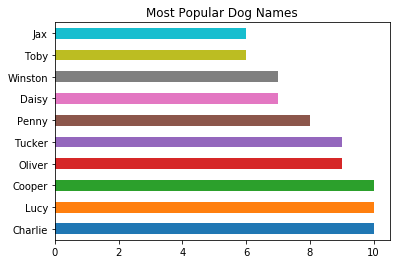

In [90]:
df_twitter.dog_name.value_counts().head(10).plot(kind='barh', title = 'Most Popular Dog Names');

### _Insight 1_

From the above graph we can see that Lucy andd Cooper and Charlie are the most common dog names in this tweets archive. 

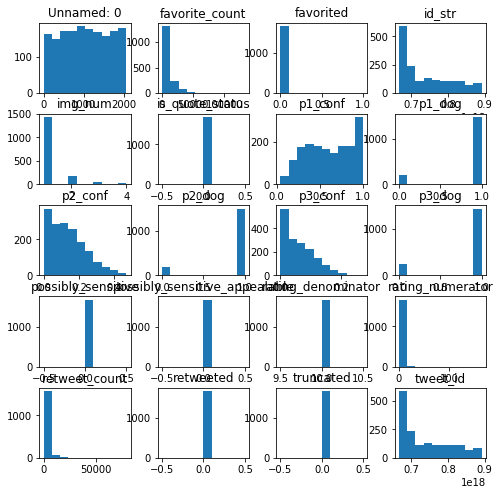

In [91]:
df_twitter.hist(figsize=(8,8),grid=False);

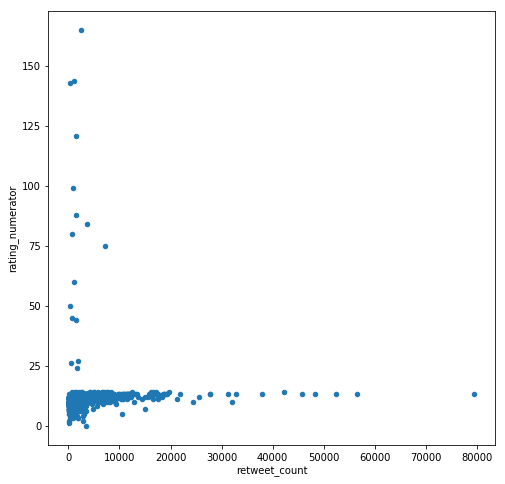

In [92]:
df_twitter.plot(x='retweet_count',y='rating_numerator',kind='scatter',figsize=(8,8));

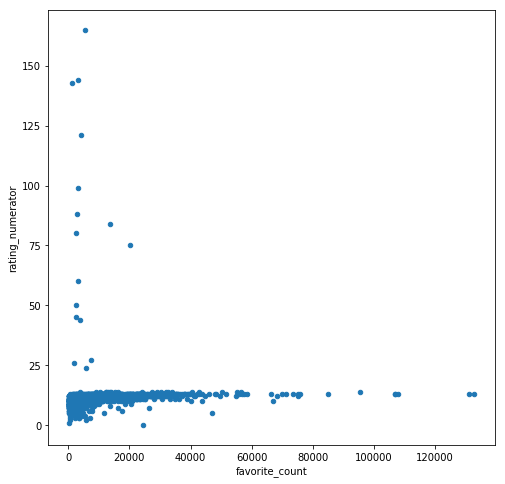

In [93]:
df_twitter.plot(x='favorite_count',y='rating_numerator',kind='scatter',figsize=(8,8));

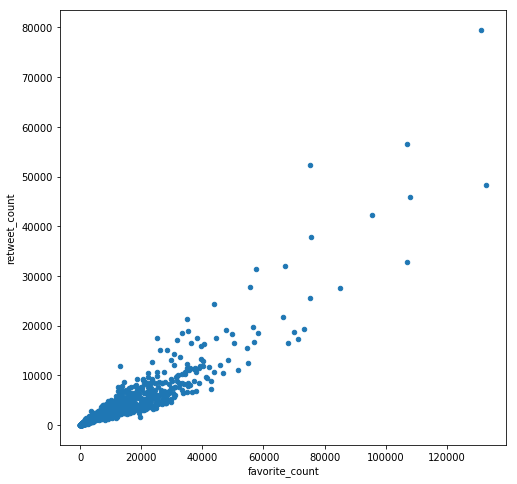

In [94]:
df_twitter.plot(x='favorite_count',y='retweet_count',kind='scatter',figsize=(8,8));

### _Insight 2_

Fro the above scatter diagrams we can see that the rating of the dog has no correlation with the `favorite_count` or `retweet_count`, but there exsits a correlation between `retweet_count` and `favorite_count` as seen in the last diagram.

In [95]:
df_twitter.dog_type.value_counts()

pupper           167
doggo             54
puppo             21
doggo/pupper       8
floofer            7
doggo/puppo        1
doggo/floofer      1
Name: dog_type, dtype: int64

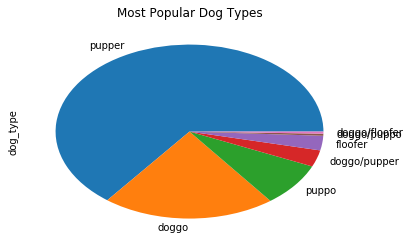

In [96]:
df_twitter.dog_type.value_counts().plot(kind='pie', title = 'Most Popular Dog Types');

### _Insight 3_

It apears that _puper_ is the most common dog type in this dataset follwed by a large margin by doggo type.

In [97]:
df_twitter.p1.value_counts()

Golden Retriever               137
Labrador Retriever              95
Pembroke                        88
Chihuahua                       79
Pug                             54
Chow                            41
Samoyed                         40
Toy Poodle                      38
Pomeranian                      38
Malamute                        29
Cocker Spaniel                  27
French Bulldog                  26
Chesapeake Bay Retriever        23
Miniature Pinscher              22
Seat Belt                       20
German Shepherd                 20
Siberian Husky                  20
Staffordshire Bullterrier       18
Maltese Dog                     18
Eskimo Dog                      18
Shetland Sheepdog               17
Beagle                          17
Cardigan                        17
Rottweiler                      17
Shih-Tzu                        17
Italian Greyhound               16
Kuvasz                          16
Lakeland Terrier                16
Great Pyrenees      

In [98]:
df_twitter.p2.value_counts()

Labrador Retriever                95
Golden Retriever                  82
Cardigan                          72
Chihuahua                         43
Chesapeake Bay Retriever          40
Pomeranian                        39
French Bulldog                    39
Toy Poodle                        36
Siberian Husky                    33
Miniature Poodle                  32
Cocker Spaniel                    32
Beagle                            28
Eskimo Dog                        27
Collie                            26
Pembroke                          25
Kuvasz                            24
Italian Greyhound                 21
Pekinese                          21
Malinois                          20
Chow                              20
Miniature Pinscher                20
Norwegian Elkhound                19
Toy Terrier                       19
American Staffordshire Terrier    19
Boston Bull                       19
Staffordshire Bullterrier         18
Samoyed                           18
P

In [99]:
df_twitter.p3.value_counts()

Labrador Retriever                75
Chihuahua                         57
Golden Retriever                  45
Eskimo Dog                        36
Kelpie                            33
Chow                              31
Kuvasz                            31
Staffordshire Bullterrier         30
Beagle                            30
Cocker Spaniel                    29
Toy Poodle                        29
Pekinese                          28
Pomeranian                        27
Pembroke                          26
Malamute                          25
Great Pyrenees                    25
French Bulldog                    25
Chesapeake Bay Retriever          24
Cardigan                          23
American Staffordshire Terrier    23
Pug                               21
Basenji                           20
Siberian Husky                    19
Bull Mastiff                      19
Toy Terrier                       18
Shetland Sheepdog                 17
Boston Bull                       17
L

### _Insight 4_

From the above results of the three prediction algorithms we can suggest that the most common dog breeds in this archive are Labrador Retriever and Golden Retriever.

## References

Mainly
https://pandas.pydata.org/pandas-docs <br/><br/>
Others
- https://chrisalbon.com/python/data_wrangling/pandas_selecting_rows_on_conditions
- https://www.geeksforgeeks.org/numpy-pad-function-in-python
- https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o
- https://www.geeksforgeeks.org/python-pandas-dataframe-duplicated/
- https://www.geeksforgeeks.org/change-the-data-type-of-a-column-or-a-pandas-series/
- https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
- https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
- https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
- https://www.youtube.com/watch?v=oY62o-tBHF4&t=2s